<a href="https://colab.research.google.com/github/Uyenuyen23/Profile/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import the data

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data.csv")
print(data)

                 mmsi     timestamp  distance_from_shore  distance_from_port  \
0        1.833071e+14  1.343786e+09        314242.187500       538727.937500   
1        1.833071e+14  1.343786e+09        314242.187500       538727.937500   
2        1.833071e+14  1.343792e+09        343947.937500       513526.093750   
3        1.833071e+14  1.343799e+09        369211.750000       491134.562500   
4        1.833071e+14  1.343805e+09        362496.250000       472878.437500   
...               ...           ...                  ...                 ...   
6811547  2.698965e+14  1.479901e+09         16999.582031        33837.019531   
6811548  2.698965e+14  1.479903e+09         19234.912109        38482.820312   
6811549  2.698965e+14  1.479907e+09         18681.083984        47433.003906   
6811550  2.698965e+14  1.479909e+09         17463.820312        40310.296875   
6811551  2.698965e+14  1.479924e+09         13601.137695        46753.535156   

         speed      course        lat  

In [20]:
# Display the first few rows of the data
print("\nSample Data:")
print(data.head())


Sample Data:
           mmsi     timestamp  distance_from_shore  distance_from_port  speed  \
0  1.833071e+14  1.343786e+09          314242.1875        538727.93750   13.1   
1  1.833071e+14  1.343786e+09          314242.1875        538727.93750   13.8   
2  1.833071e+14  1.343792e+09          343947.9375        513526.09375   13.0   
3  1.833071e+14  1.343799e+09          369211.7500        491134.56250   13.4   
4  1.833071e+14  1.343805e+09          362496.2500        472878.43750   12.6   

      course       lat         lon  is_fishing         source  
0  62.700001  2.230797  157.382812        -1.0  crowd_sourced  
1  65.199997  2.232352  157.386047        -1.0  crowd_sourced  
2  61.700001  2.410787  157.745605        -1.0  crowd_sourced  
3  63.799999  2.591992  158.094574        -1.0  crowd_sourced  
4  66.000000  2.759518  158.458908        -1.0  crowd_sourced  


# 2. Clean the data

In [21]:
#Remove rows with missing critical values
print(data.isnull().sum())
data.dropna(subset=['speed', 'distance_from_port'], inplace = True)
#Remove duplicates
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)
# change the timestamp format to date
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
print("cleaned data:\n", data.head())

mmsi                    0
timestamp               0
distance_from_shore     0
distance_from_port      0
speed                  19
course                 19
lat                     0
lon                     0
is_fishing              0
source                  0
dtype: int64
0
cleaned data:
            mmsi           timestamp  distance_from_shore  distance_from_port  \
0  1.833071e+14 2012-08-01 01:49:57          314242.1875        538727.93750   
1  1.833071e+14 2012-08-01 01:50:55          314242.1875        538727.93750   
2  1.833071e+14 2012-08-01 03:39:55          343947.9375        513526.09375   
3  1.833071e+14 2012-08-01 05:28:55          369211.7500        491134.56250   
4  1.833071e+14 2012-08-01 07:17:55          362496.2500        472878.43750   

   speed     course       lat         lon  is_fishing         source  
0   13.1  62.700001  2.230797  157.382812        -1.0  crowd_sourced  
1   13.8  65.199997  2.232352  157.386047        -1.0  crowd_sourced  
2   13.0  61.700

#3. Analyze the data

### 3.1. Descriptive data

In [22]:
# Select relevant numerical columns
numerical_cols = ["distance_from_shore", "distance_from_port", "speed", "course", "lat", "lon"]

# Compute basic statistics
basic_stats = data[numerical_cols].describe().T  # Transpose for better readability
print("\nDescriptive Statistics:")
print(basic_stats)

# Compute median separately
median_values = data[numerical_cols].median()
print("\nMedian Values:")
print(median_values)

# Compute mode separately
mode_values = data[numerical_cols].mode().iloc[0]
print("\nMode Values:")
print(mode_values)



Descriptive Statistics:
                         count           mean            std         min  \
distance_from_shore  6811533.0  324438.321981  512176.192261    0.000000   
distance_from_port   6811533.0  478629.654472  701425.249106    0.000000   
speed                6811533.0       3.791863       5.270977    0.000000   
course               6811533.0     183.541321     114.733234    0.000000   
lat                  6811533.0      20.108628      38.950495  -83.672379   
lon                  6811533.0      16.665386      82.963993 -179.999176   

                              25%           50%            75%           max  
distance_from_shore      0.000000  38012.222656  518941.968750  3.509276e+06  
distance_from_port   17719.609375  97619.320312  738854.687500  1.095999e+07  
speed                    0.000000      2.100000       7.200000  1.023000e+02  
course                  81.500000    193.500000     282.500000  5.110000e+02  
lat                    -20.148178     35.690739

### 3.2. Data Visualization

3.2.1. Vessel speed distribution chart

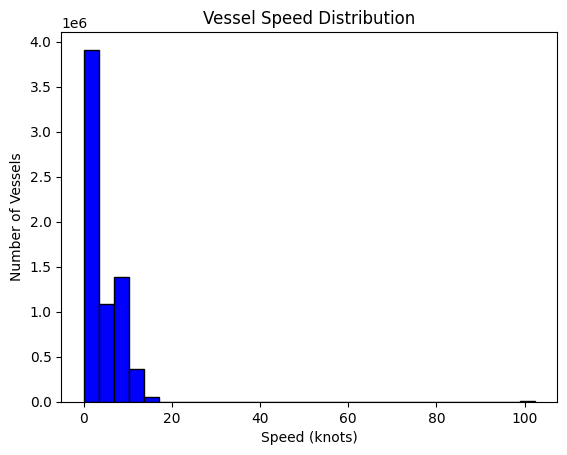

In [23]:
import matplotlib.pyplot as plt

plt.hist(data["speed"], bins=30, color="blue", edgecolor="black")
plt.title("Vessel Speed Distribution")
plt.xlabel("Speed (knots)")
plt.ylabel("Number of Vessels")
plt.show()


3.2.2. Speed and distance_from_shore scatter plot

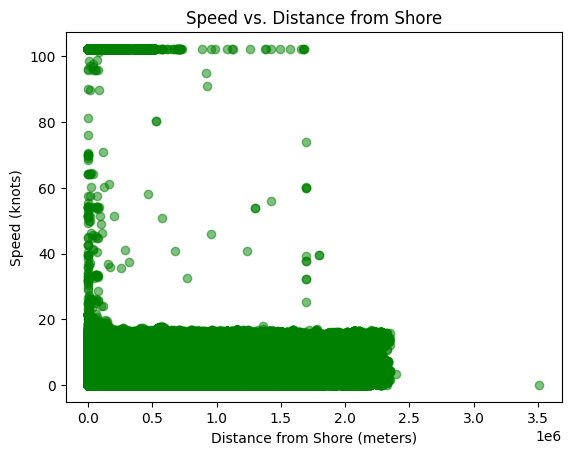

In [24]:
plt.scatter(data["distance_from_shore"], data["speed"], alpha=0.5, color="green")
plt.title("Speed vs. Distance from Shore")
plt.xlabel("Distance from Shore (meters)")
plt.ylabel("Speed (knots)")
plt.show()


3.2.3. Fishing activity distribution heatmap

In [25]:
import folium
from folium.plugins import HeatMap

fishing_vessels = data[data["is_fishing"] == 1]  # Only vessels that are fishing

# Create a map
m = folium.Map(location=[data["lat"].mean(), data["lon"].mean()], zoom_start=4)

# Add heatmap
HeatMap(fishing_vessels[["lat", "lon"]].values, radius=10).add_to(m)

# Show the map
m


### 3.3. Time Series Analysis

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# Extract date and week from timestamp

data['date'] = data['timestamp'].dt.date  # Extract date (YYYY-MM-DD)
data['week'] = data['timestamp'].dt.to_period('W')
print("Extracted date and week:")
print(data[['date', 'week']].head())

Extracted date and week:
         date                   week
0  2012-08-01  2012-07-30/2012-08-05
1  2012-08-01  2012-07-30/2012-08-05
2  2012-08-01  2012-07-30/2012-08-05
3  2012-08-01  2012-07-30/2012-08-05
4  2012-08-01  2012-07-30/2012-08-05


In [28]:
# Filter only fishing vessels

data_fishing = data[data['is_fishing'] == 1]
print("Filtered fishing vessels:")
print(data_fishing.head())

Filtered fishing vessels:
                 mmsi           timestamp  distance_from_shore  \
3919408  1.039982e+14 2012-06-01 17:33:14         510385.37500   
3919409  1.039982e+14 2012-06-01 17:33:54         511335.65625   
3919410  1.039982e+14 2012-06-01 17:36:14         512597.40625   
3919411  1.039982e+14 2012-06-01 17:36:20         512286.18750   
3919419  1.039982e+14 2012-06-02 15:04:39         504735.09375   

         distance_from_port  speed      course        lat         lon  \
3919408         652892.0625    9.9  119.900002  55.464817  147.860275   
3919409         653719.3750    9.5  113.699997  55.464035  147.863052   
3919410         653987.0000    6.8   44.599998  55.462502  147.872299   
3919411         654547.1875    6.4   36.000000  55.462666  147.872513   
3919419         652996.2500    1.0  103.699997  55.490982  147.815094   

         is_fishing               source        date                   week  
3919408         1.0  dalhousie_longliner  2012-06-01  2012-0

In [29]:
# Group by date and count fishing vessels per day

fishing_per_day = data_fishing.groupby('date').size()
print("Daily fishing vessel count:")
print(fishing_per_day.head())

Daily fishing vessel count:
date
2012-05-27    1
2012-06-01    6
2012-06-02    1
2012-06-04    1
2012-06-05    1
dtype: int64


In [30]:
# Group by week and count fishing vessels per week

fishing_per_week = data_fishing.groupby('week').size()
print("Weekly fishing vessel count:")
print(fishing_per_week.head())

Weekly fishing vessel count:
week
2012-05-21/2012-05-27     1
2012-05-28/2012-06-03     7
2012-06-04/2012-06-10    10
2012-06-18/2012-06-24    36
2012-06-25/2012-07-01    56
Freq: W-SUN, dtype: int64


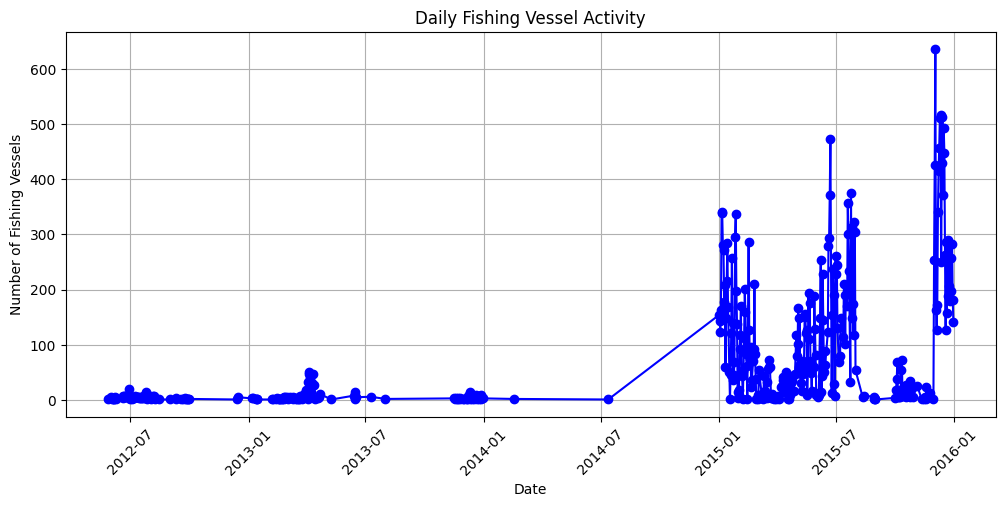

In [31]:
# Plot daily fishing activity

plt.figure(figsize=(12, 5))
plt.plot(fishing_per_day.index, fishing_per_day.values, marker='o', linestyle='-', color='blue')
plt.title('Daily Fishing Vessel Activity')
plt.xlabel('Date')
plt.ylabel('Number of Fishing Vessels')
plt.xticks(rotation=45)
plt.grid()
plt.show()

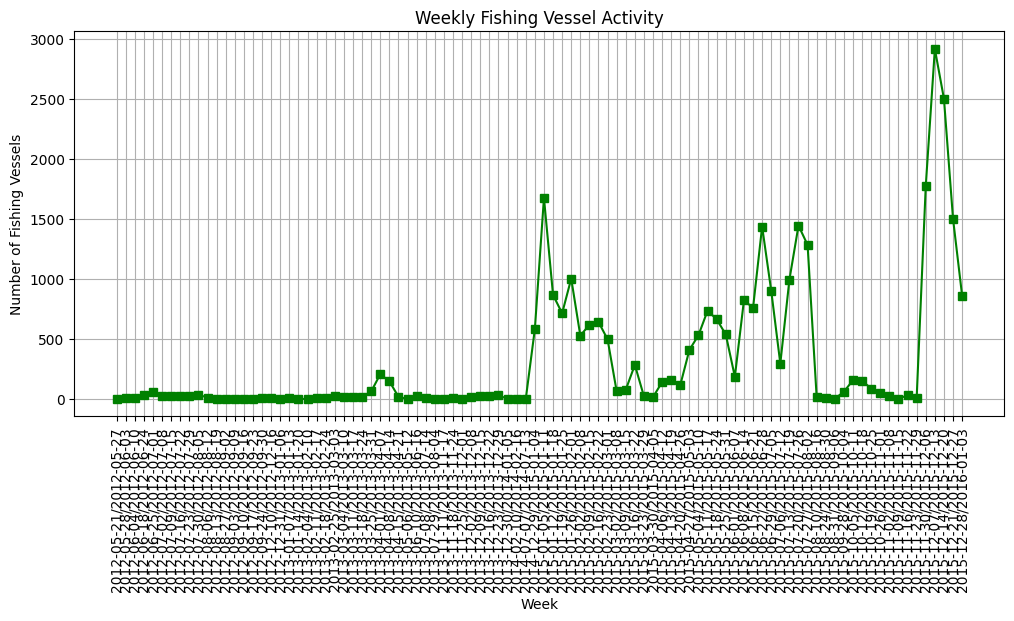

Time series analysis complete.


In [36]:
# Plot weekly fishing activity

plt.figure(figsize=(12, 5))
plt.plot(fishing_per_week.index.astype(str), fishing_per_week.values, marker='s', linestyle='-', color='green')
plt.title('Weekly Fishing Vessel Activity')
plt.xlabel('Week')
plt.ylabel('Number of Fishing Vessels')
plt.xticks(rotation=90)
plt.grid()
plt.show()

print("Time series analysis complete.")

### 3.4. Spacial Analysis

In [33]:
import folium
from folium.plugins import HeatMap
import pandas as pd

In [34]:
# Filter only fishing vessels
fishing_vessels = data[data["is_fishing"] == 1]

# Print dataset summary
print("\nFishing Vessel Data (Sample):")
print(fishing_vessels[["lat", "lon"]].head())

print("\nTotal Fishing Vessel Records:", len(fishing_vessels))


Fishing Vessel Data (Sample):
               lat         lon
3919408  55.464817  147.860275
3919409  55.464035  147.863052
3919410  55.462502  147.872299
3919411  55.462666  147.872513
3919419  55.490982  147.815094

Total Fishing Vessel Records: 30201


In [35]:
# Create a map centered at the average location of fishing activity
m = folium.Map(location=[fishing_vessels["lat"].mean(), fishing_vessels["lon"].mean()], zoom_start=5)

# Add a heatmap layer
HeatMap(fishing_vessels[["lat", "lon"]].values, radius=10).add_to(m)

print("\nFishing Activity Heatmap Generated.")

# Display the map
m


Fishing Activity Heatmap Generated.
